In [1]:
#!/usr/bin/env python
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import gamma as Γ
#
# Define the custom Gamma distribution PDF
def gamma_pdf(θ, α, β):
    return (β ** α) * (θ ** (α - 1)) * np.exp(-β * θ) / Γ(α)
#

Define the parameters for the two posterior distributions

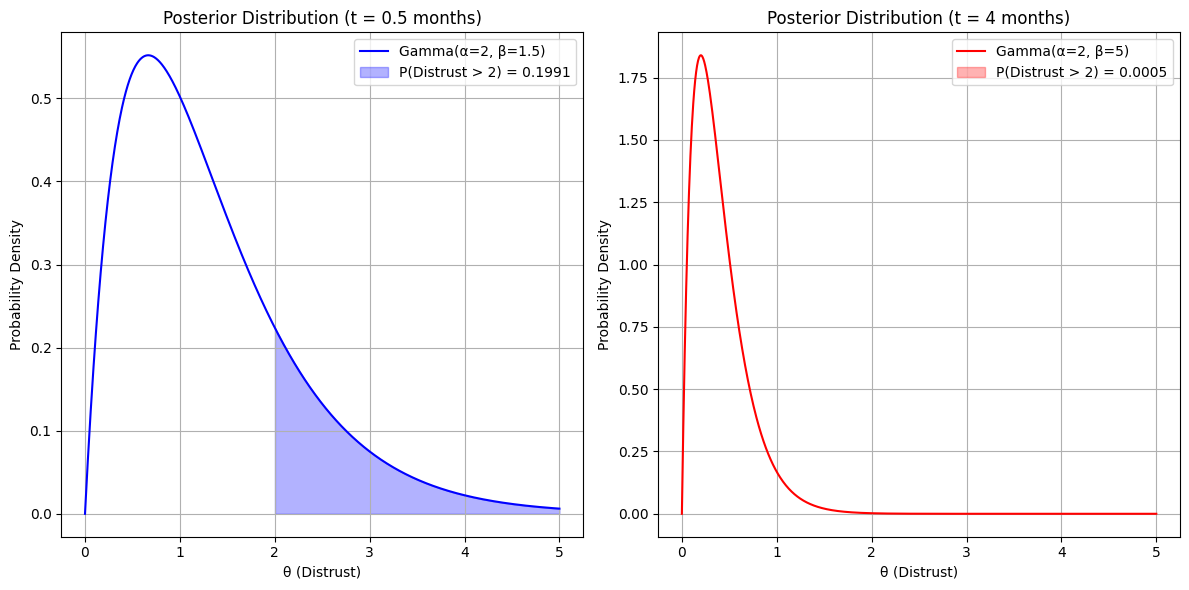

In [2]:
αₗ = 2; βₗ = 1.5
αշ = 2; βշ = 5
#
# Generate θ values (distrust) for the plot
distrust = np.linspace(0, 5, 1000)
#
# Calculate the PDF for the two posterior distributions using the custom Gamma PDF
pdf_1 = gamma_pdf(distrust, αₗ, βₗ)
pdf_2 = gamma_pdf(distrust, αշ, βշ)
#
# Calculate the probability of distrust > 2 for both cases
prob_1, _ = quad(lambda θ: gamma_pdf(θ, αₗ, βₗ), 2, np.inf)
prob_2, _ = quad(lambda θ: gamma_pdf(θ, αշ, βշ), 2, np.inf)
#
# Plot the two posterior distributions side by side
plt.figure(figsize=(12, 6))
#
# Plot for t = 0.5 months
plt.subplot(1, 2, 1)
plt.plot(distrust, pdf_1, label=f'Gamma(α=2, β=1.5)', color='blue')
plt.fill_between(distrust[distrust > 2], pdf_1[distrust > 2], color='blue', alpha=0.3, label=f'P(Distrust > 2) = {prob_1:.4f}')
plt.title('Posterior Distribution (t = 0.5 months)')
plt.xlabel('θ (Distrust)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
#
# Plot for t = 4 months
plt.subplot(1, 2, 2)
plt.plot(distrust, pdf_2, label=f'Gamma(α=2, β=5)', color='red')
plt.fill_between(distrust[distrust > 2], pdf_2[distrust > 2], color='red', alpha=0.3, label=f'P(Distrust > 2) = {prob_2:.4f}')
plt.title('Posterior Distribution (t = 4 months)')
plt.xlabel('θ (Distrust)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
#
plt.tight_layout()
plt.show()